In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

## 2.1 실제 데이터로 작업하기

유명한 공개 데이터 저장소
- UC얼바인 : http://archive.ics.uci.edu/ml
- 캐글 : http://kaggle.com/datasets
- 아마존 aws : http://aws.amazon.com/ko/datasets

메타 포털
- http://dataportals.org
- http://opendatamonitor.eu/
- http://quandl.com

인기있는 공개 데이터 저장소가 나열되어 있는 페이지
- 위키백과 머신러닝 데이터셋 목록 http://goo.gl/SJHN2k
- Quora.com 질문 http://goo.gl/zDR78y
- 데이터셋 서브레딧 http://www.reddit.com/r/datasets

이 장에서는 StatLib 저장소의 캘리포니아 주택 가격 데이터셋을 사용합니다. 범주형 특성을 추가하고 몇개 특성을 제외 했습니다.

## 2.2 큰 그림 보기

캘리포니아 인구조사 데이터를 사용해 캘리포니아의 주택 가격 모델을 만드는 것입니다. <br>
이 데티어는 캘리포니아의 블록 그룹마다 인국, 중간소득, 중간 주택 가격등을 담고 있습니다. <br>
블록그룹은 미국 인구조사국에서 샘플 데이터를 발표하는 데 사용하는 최소한의 지리적 단위입니다.( 한 불록그룹은 보통 600~3000명의 인구를 나타냅니다.)

이 데이터로 모델을 학습시켜서 다른 측정 데이터가 주어졌을 때 구역의 중간 주택 가격을 예측해야 합니다.

### 2.2.1 문제 정의

첫번째로 해야 할 질문은 '비즈니스의 목적이 정확히 무엇인가요?' 입니다. <br>
문제를 어떻게 구성할지, 어떤 알고리즘을 선택할지, 모델 평가에 어떤 성능지표를 사용할지, 모델 튜닝을 위해 얼마나 노력을 투여할지를 결정할 중요한 질문입니다.

다음으로 할 질문은 '현재 솔루션은 어떻게 구성되어 있나요?'입니다. 이는 문제 해결 방법에 대한 정보는 물론이고 참고 성능으로도 사용 할 수 있습니다.<br>

시스템을 설계할 준비가 되었다면 문제를 정의해야 합니다.<br>
이는 지도학습, 비지도학습, 강화학습 중 무엇일까요? 분류나 회귀인가요 아니면 다른 어떤 작업인가요? 배치 학습과 온라인 학습 중 어느 것을 사용해야 하나요?<br>
위 질문의 답을 찾고 설계를 진행해야 합니다.

레이블된 훈련 샘플이 있으니 이는 전형적인 지도 학습 작업입니다. 또 한 값을 예측해야 하므로 전형적인 회귀문제입니다. <br>
좀 더 구체적으로는 예측에 사용할 특성이 여러 개이므로 다변량 회귀문제입니다.<br>

### 2.2.2 성능 측정 지표 선택

성능 측정 지표를 선택하는 것입니다. 회귀 문제의 전형적인 성능 지표는 평균 제곱근 오차(Root Mean Square Error)입니다.<br>
오차가 커질수록 이 값은 더욱 커지므로 예측에 얼마나 많은 오류가 있는지 가늠하게 해줍니다.

$$
RMSE(X, h) = \sqrt{\dfrac{1}{m} \sum^m_{i=1} (h(x^{(i)})-y^{(i)})^2 }
$$

**표기법**

$
\mathbf{x}^{(1)}  = \begin{bmatrix} -118.29 \\ 33.91 \\ 1416 \\ 38372 \\ \end{bmatrix} \\ 
\mathbf{X} = \begin{bmatrix} 
(\mathbf{X}^{(1)})^T  \\ (\mathbf{X}^{(2)})^T \\ \vdots \\ (\mathbf{X}^{(m)})^T 
\end{bmatrix} =
\begin{bmatrix}
-118.29 & 33.91 & 1416 & 38372 \\
\vdots & \vdots & \vdots & \vdots \\
\end{bmatrix}
$

RMSE가 일반적으로 회귀 문제에 선호되는 성능 측정 방법이지만 경우에 따라 다른 함수를 사용할 수 있습니다. 예를 들어 이상치로 보이는 구역이 많다고 가정합시다. 이런 경우에는 평균 절대 오차(Mean Absolute Error)를 고려해 볼 수 있습니다.

$$
MAE(X, h) = \dfrac{1}{m} \sum^m_{i=1} |h(X^{(i)}-y^{(i)} |
$$

RMSE, MAE 모두 예측값의 벡터와 타깃값의 벡터 사이의 거리를 재는 방법입니다. 거리 측정에는 여러 가지 방법(norm)이 가능합니다.<br>

- RMSE는 유클리디안 놈(Euclidian Norm)에 해당합니다. 우리와 친숙한 거리개녑입니다. $ l_2$  놈이라고 부르며 $\Vert A \Vert_2 $ 또는 그냥 $\Vert A \Vert $로 표기합니다

- 절대값의 합을 계산하는 것은 $l_1$ 놈에 해당하며 $\Vert A \Vert_1 $ 로 표기합니다. <br>
이는 도시의 구획이 지각으로 나뉘어 있을 때 도시의 두 지점 사이의 거리를 측정하는 것과 같아 맨하튼 놈 이라고도 합니다.

- 일반적으로 원소가 n개인 벡터 $v$의 $l_k$ 놈은 $\Vert A \Vert_k =( |v_0|^k + |v_1|^k + \dots + |v_n|^k)^{1/k} $ 로 정의합니다.<br> $l_0$은 단순히 벡터에 있는 0이아닌 원수의 수이고 $l_\infty$ 는 벡터에서 가장 큰 절댓값이 됩니다.

- 놈의 지수가 클수록 큰 값의 원소에 치우치며 작은 값은 무시됩니다. 그래서 RMSE가 MAE보다 조금 더 이상치에 민감합니다.<br>
하지만 이상치가 매우 드믈면(정규분포) RMSE가 잘 맞아 일반적으로 널리 사용됩니다.

### 2.2.3 가정 검사

지금까지 마든 가정을 나열하고 검사해보는 것이 좋습니다. 이 과정에서 심각한 문제를 일직 발견할 수도 있습니다.<br>
예를들어 시스템이 출력한 구역의 가격이 다음 머신러닝 시스템의 입력으로 들어가게 되는데 이 값이 있는 그대로 사용될 거라 가정했습니다. <br>
하지만 하위 시스템에서 이 값을 (저렴, 보통, 고가)같은 카테고리로 바꾸고 가격 대신 카테고리를 사용하면 어떻게 될까요??<br>
이럴 때는 가격을 구하는 것이 전혀 중요하지 않습니다. 올바른 카테고리를 구하는 시스템이 필요합니다. 그렇다면 이 문제는 회귀가 아니라 분류 작업이 됩니다.<br>

## 2.3 데이터 가져오기

### 2.3.1 작업환경 만들기

### 2.3.2 데이터 다운로드

### 2.3.3 데이터 구조 훑어보기

In [104]:
housing = pd.read_csv('datasets/housing/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


info()메서드는 데이터에 대한 간략한 설명과 특히 전체 행 수, 각 특성의 데이터 타입과 널이 아닌 값의 개수를 확인하는 데 유용합니다.

In [105]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


20640개의 샘플데이터가 있습니다. 머신러닝 프로젝트치고는 상당히 작은 편입니다. <br>
total_bedrooms 특성은 20433개만 null 값이 아닙니다. 207개의 구역(행)에서 이 특성값이 null 값이란 뜻입니다. <br>
ocean_proximity를 제외한 모든 특성이 숫자형 데이터입니다. ocean_proximity 데이터 타입은 문자열 입니다. <br>
ocean_proximity을 살펴보면 범주형 데이터 입니다.

In [106]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

describe()를 사용하여 데이터의 요양정보를 알 수 있습니다.<br>
hist()메서드를 사용하면 모든 숫자형 특성에 대한 히스토그램을 출력합니다.

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


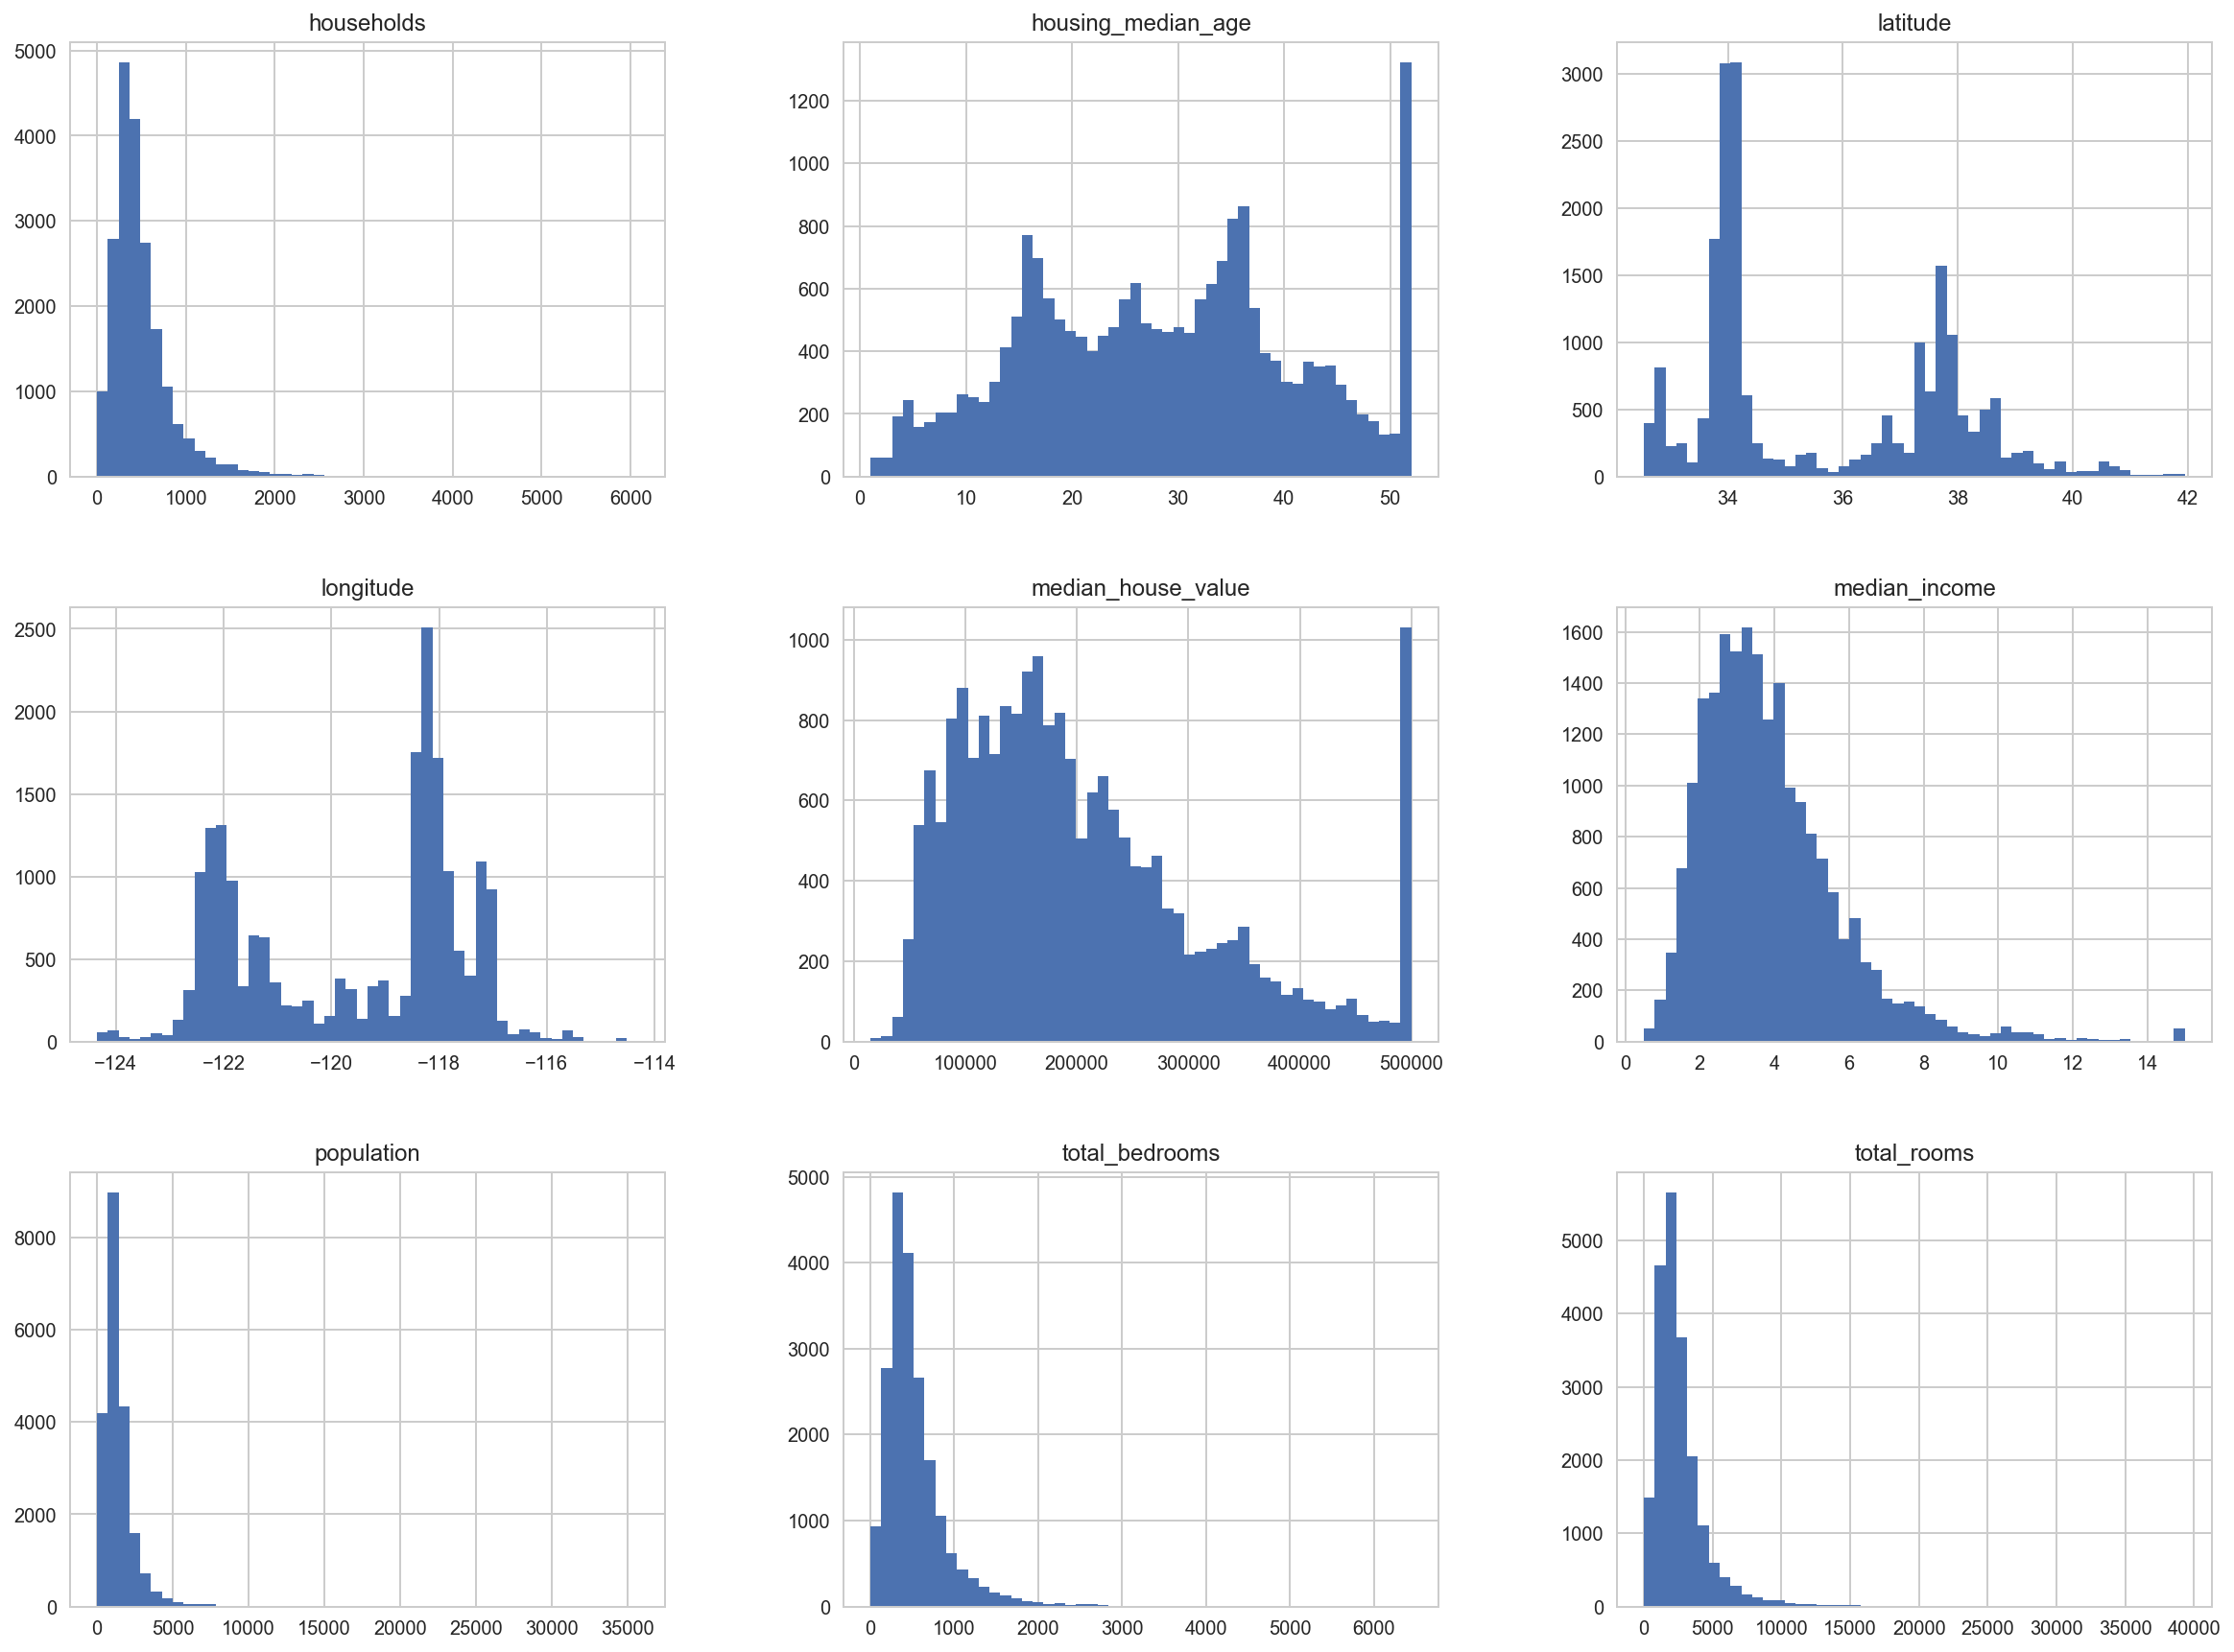

In [6]:
housing.hist(bins=50, figsize=(20, 15));

1. median_income특성이 US달러로 표현되어 있지 않은 것 같습니다. 최소를 0.5 최대를 15로 정규화 되어있습니다.
1. housing_median_age, median_house_value역시 최대값과 최소값을 한정했습니다. median_house_value은 종속변수(레이블)로 사용되기 때문에 심각한 문제가 될 수 있습니다. 가격이 한계값을 넘어가지 않도록 머신러닝 알고리즘이 학습될지도 모릅니다. 
    - 한계값 밖의 구역에 대한 정확한 레이블을 구합니다.
    - 훈련 세트에서 이런 구역을 제거합니다. 500,000 가 넘는 값에 대한 예측은 평가 결과가 매우 나쁠 것이므로 테스트 세트에서도 제거합니다.
1. 특성들의 스케일이 서로 많이 다릅니다. 특성 스케일을 맞추는 작업이 필요합니다.
1. 히스토그램의 대부분 그래프가 꼬리가 두껍습니다. 가운데에서 왼쪽보다 오른쪽으로 더 멀리 뻗어 있습니다. 이런 형태는 패턴을 찾기 어렵게 만듭니다. 이런 특성들을 종모양의 정규분포가 되도록 변형시키겠습니다.

### 2.3.4 테스트 세트 만들기

우리 뇌는 과대적합되기 쉬운 엄청난 패턴 감지 시스템입니다. <br> 
만약 테스트 세트를 본다면 테스트 세트에서 겉으로 드러난 어떤 패턴에 속아 특정 머신러닝 모델을 선택하게 될지도 모릅니다. <br>
이 테스트 세트로 일반화 오차를 추정하면 매우 낙관적인 추정이 되며 시스템을 론칭했을 때 기대한 성능이 나오지 않을 것입니다. <br>
이를 데이터 스누핑편향이라고 합니다.

In [107]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    
    return data.iloc[train_indices], data.iloc[test_indices]

In [108]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), len(test_set))

16512 4128


간단한 테스트데이터 분류 함수입니다. 다시 실행하면 다른 테스트 세트가 생성됩니다. 올바른 방법은 아닙니다. <br>
같은 인덱스가 생성되도록 np.random.permutation()을 호출하기 전에 난수 발생기의 초깃값을 지정하는 것입니다. <br>
np.random.seed(42)를 사용하면 됩니다.

위의 방법도 업데이트된 데이터셋을 사용하려면 문제가 됩니다. 일반적인 해결책은 샘플의 식별자를 사용하여 테스트 세트로 보낼지 말지 정하는 것입니다.<br>
예를 들어 샘플마다 식별자의 해시값을 계산하여 해시의 마지막 바이트의 값이 51(256의 20% 정도)보다 작거나 같은 샘플만 테스트 세트로 보낼 수 있습니다.<br>
이렇게 하면 여러 번 반복 실행되면서 데이터셋이 갱신되더라도 테스트 세트가 동일하게 유지됩니다. <br>
새로운 테스트 세트는 새 샘플의 20%를 갖게 되지만 이전에 훈련 세트에 있던 샘플은 포함시키지 않을 것입니다.

In [109]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_ : test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

주택 데이터셋에는 식별자 컬럼이 없습니다. 대신 행의 인덱스 ID를 사용하면 간단히 해결됩니다.

In [110]:
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'index')

In [111]:
len(train_set), len(test_set)

(16512, 4128)

행의 인덱스를 식별자로 사용하지 못할 때는 안전한 특성을 사용해야 합니다. <br>
예를 들어 구역의 위도와 경도는 몇백 년 후까지 안정적이라고 보장할 수 있으므로 두 값을 연결하여 다음과 같이 ID를 만들 수 있습니다.

In [112]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

사이킷런은 데이터셋을 여러 서브셋으로 나누는 다양한 방법을 제공합니다. train_test_split이 대표적입니다.<br>
특징은 다음과 같습니다.
1. random_state 매개변수를 사용하여 매번 동일한 결과를 얻을 수 있습니다.
1. 행의 개수가 같은 여러 개의 데이터셋을 넘겨서 같은 인덱스를 기반으로 나눌 수 있습니다.<br>

In [113]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

위의 예시는 순수한 무작위 데이터 샘플링 방식입니다.<br>
데이터셋이 충분히 크다면 일반적으로 괜찮지만 그렇지 않다면 샘플링 편향이 생길 가능성이 큽니다. <br>
설문조사 기관에서 1000명에게 질문 몇 개를 하려 할 때 무작위로 1000을 뽑는것이 아닙니다. <br>
전체 인구를 대표할 수 있는 1000명을 선택하기 위해 노력합니다. <br>
인구의 51.3%가 여성이고 48.7%가 남성이라면, 잘 구성된 설문조사는 샘플에서도 이 비율을 유지해야 합니다. 즉 여성은 513명 남성은 487명이어야 합니다.<br> 이를 계층적 샘플링이라고 합니다. 

median_income이 median_house_value을 예측하는데 매우 중요하다고 합니다.<br>
이 경우 테스트 세트가 전체 데이터셋에 있는 여러 소득 카테고리를 잘 대표해야 합니다. <br>
중간 소득이 연속적인 숫자형 특성이므로 소득에 대한 카테고리 특성을 만들어 보겠습니다. <br>

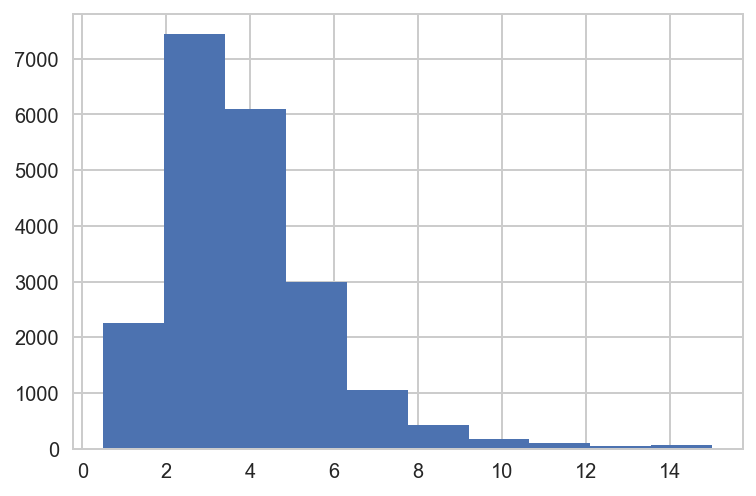

In [114]:
housing["median_income"].hist();

계층별로 데이터셋에 충분한 샘플 수가 있어야 합니다. 그렇지 않으면 계층의 중요도를 추정하는 데 편향이 발생할 것입니다.<br>
이 말은 너무 많은 계층으로 나누면 안 된다는 뜻이고 각 계층이 충분히 커야 합니다.

In [115]:
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
housing['income_cat'].where(housing['income_cat']<5, 5.0, inplace=True)

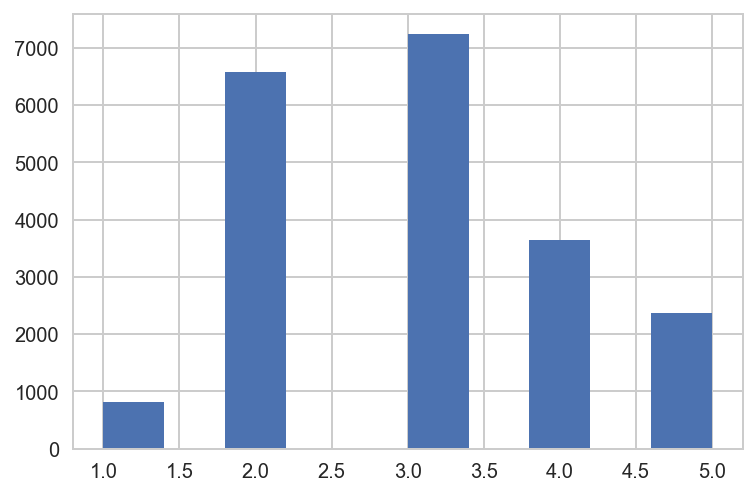

In [116]:
housing['income_cat'].hist();

이제 소득 카테고리를 기반으로 계층 샘플링을 할 준비가 되었습니다. StratifiedShuffleSplit 사용합니다.

In [117]:
housing['income_cat'].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [118]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    start_train_set = housing.loc[train_index]
    start_test_set = housing.loc[test_index]

In [119]:
start_train_set['income_cat'].value_counts()/len(strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [120]:
start_test_set['income_cat'].value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

## 2.4 데이터 이해를 위한 탐색과 시각화

훈련 세트에 대해서만 탐색을 시작하겠습니다. 또한 훈련 세트가 매우 크면 조작을 간단하고 빠르게 하기 위해 탐색을 위한 세트를 별도로 샘플링할 수도 있습니다.

In [121]:
housing = start_train_set.copy()

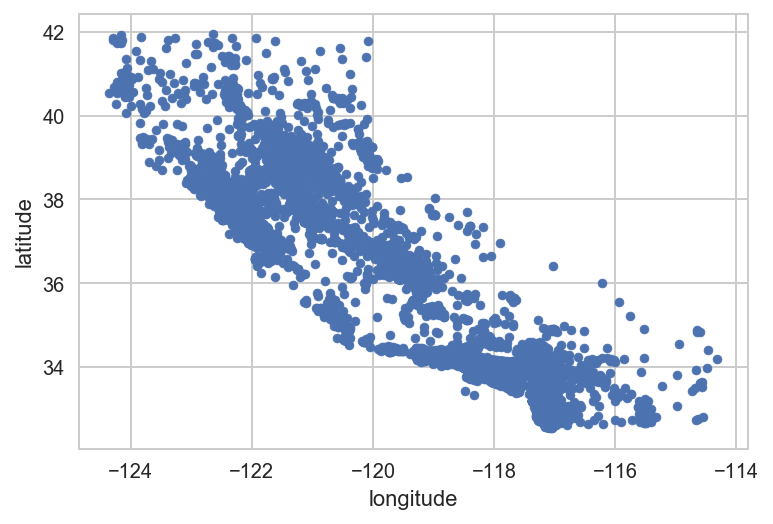

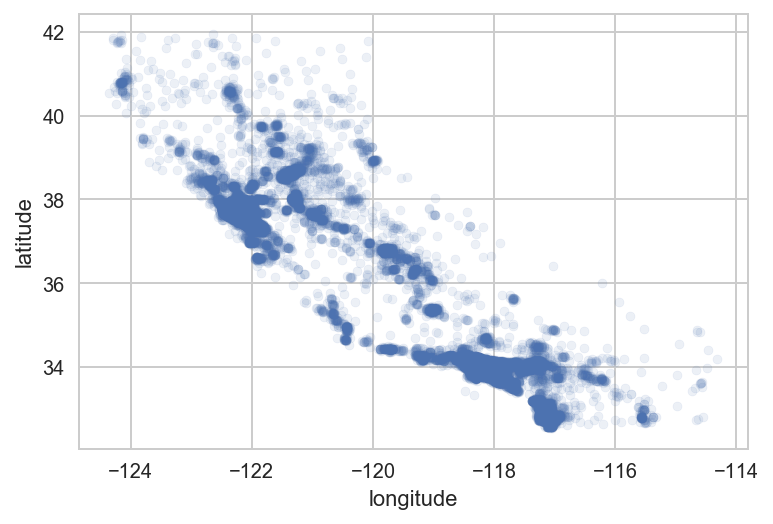

In [122]:
ax = housing.plot(kind="scatter", x="longitude", y="latitude");
ax = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1);

alpha옵션으로 데이터가 밀집된 영역을 잘 나타낼수 있습니다.<br>

이제 주택가격을 나타내보겠습니다. 원의 반지름은 구역의 인구를 나타내고 색깔은 가격을 나타냅니다.

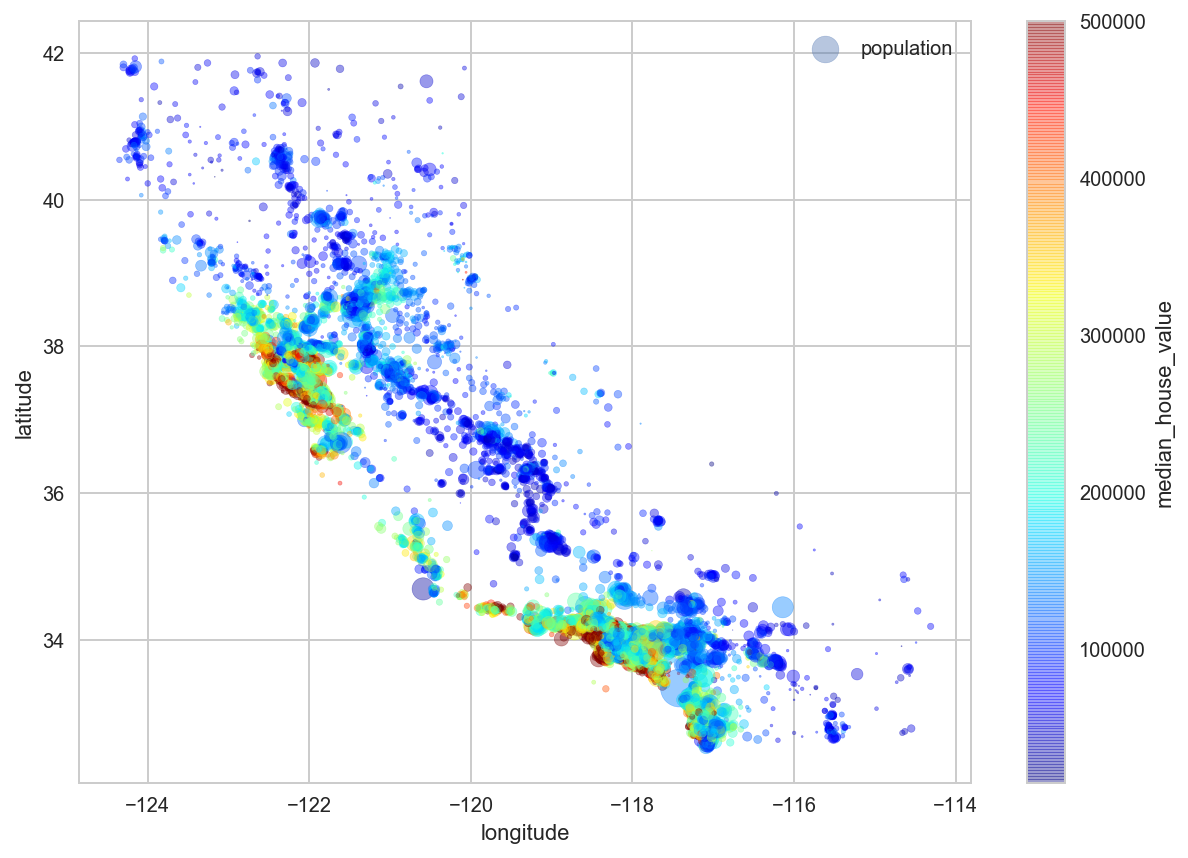

In [45]:
ax = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False) 
plt.legend() ;

주택 가격은 지역과 인구 밀도에 관련이 매우 크다는 사실을 알 수 있습니다. 이런 내용은 군집 알고리즘을 사용해 주요 군집을 찾고 군집의 중심까지의 거리를 재는 특성을 추가할 때 도움이 됩니다. 해안 근접성 특성이 유용할 수도 있지만 예외 지역도 있습니다.

### 2.4.2 상관관계 조사

corr()을 이용해 피어슨 상관계수를 구할수 있습니다.<br>

In [49]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432,-0.016243
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724,-0.078848
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110,-0.139385
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097,0.221690
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689,0.012502
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920,0.022848
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506,0.034995
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160,0.902156
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000,0.642274
income_cat,-0.016243,-0.078848,-0.139385,0.221690,0.012502,0.022848,0.034995,0.902156,0.642274,1.000000


In [51]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
income_cat            0.642274
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

상관관계는 -1 ~ 1의 값을 나타냅니다. 1에 가까우면 양의 상관관계 -1에 가까우면 음의 상관관계입니다.<br>
median_house_value은 median_income이 올라 갈때 증가하는 경향이 있습니다. <br>
위도와 중간 주택 가격 사이에는 약한 음의 상관관계가 보입니다. <br>
0에 가까우면 상관관계가 없다는 뜻입니다.

median_house_value 와 상관이 높은 몇개의 특성과의 상관관계를 그래프로 보겠습니다.

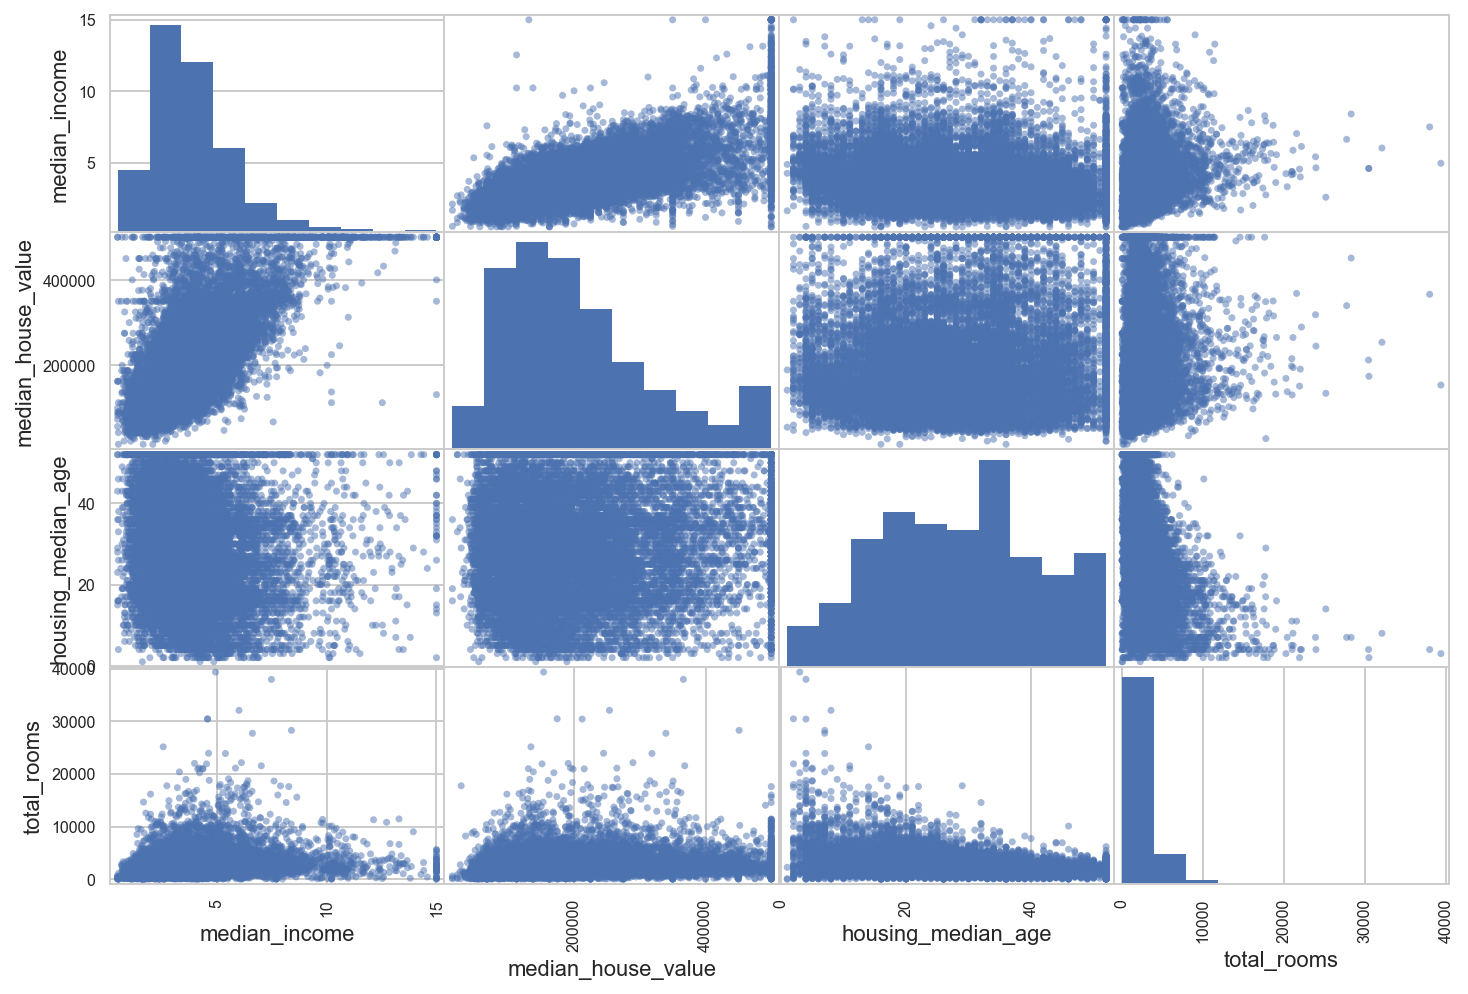

In [52]:
attributes=['median_income','median_house_value','housing_median_age','total_rooms']
pd.scatter_matrix(housing[attributes], figsize=(12, 8));

median_house_value와 median_income의 그래프만 다시 출력해보겠습니다.

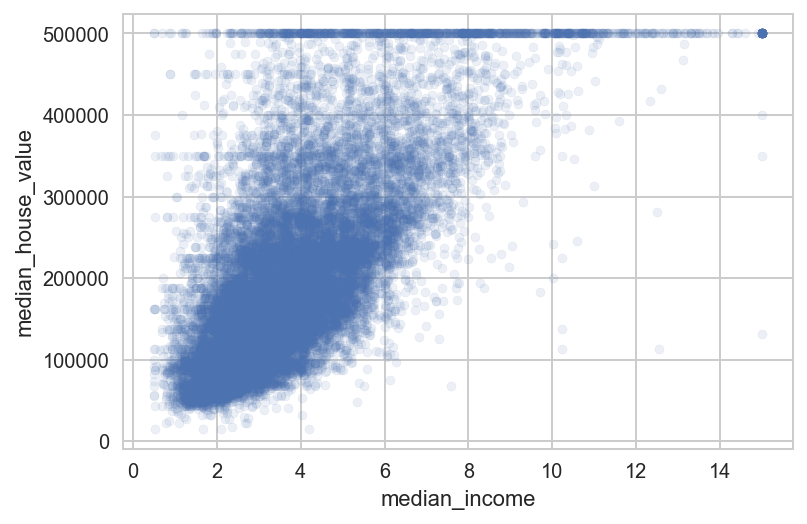

In [78]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1);

상관관계가 매우 강한게 나타납니다. 가격 제한 값이 500000에서 수평선으로 잘 보입니다. <br>
450000, 350000, 280000에서도 직선에 가까운 형태를 더 볼 수 있습니다. <br>
알고리즘이 데이터에서 이런 이상한 형태를 학습하지 않도록 해당 구역을 제거하는 것이 좋습니다.

### 2.4.3 특성조합으로 실험

머신러닝 알고리즘을 사용하기 전에 정제해야할 데이터를 확인했고 특성 사이에서 상관관계를 확인했습니다.<br>
어떤 특성은 꼬리가 두꺼운 부높라서 데이터를 변형해야 할 것입니다.

여러 특성의 조합을 시도해보는 방법이 남았습니다. 예를 들어 얼마나 많은 가구수가 있는지 모른다면 특정 구역의 방개수는 그다지 유용하지 않습니다.<br>
진짜 필요한 것은 가구당 방 개수입니다. 전체 침대 개수도 그 자체로 유용하지 않습니다. <br>
방 개수와 비교하는게 낫습니다. 가구당 인원도 흥미로운 특성 조합일 것같습니다.

In [123]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [124]:
corr_matrix = housing.corr()
corr_matrix.median_house_value.sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
income_cat                  0.642274
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

bedrooms_per_room 특성은 전체 방 개수나 침대 개수보다 중간 주택 가격과의 상관관계가 훨씬 높습니다. <br>
확실히 침대/방의 비율이 낮은 집은 훨씬 비싼 경향이 있습니다.<br>
가구당 방 개수도 구역 내 전체 방 개수보다 더 유용합니다.

## 2.5 머신러닝 알고리즘을 위한 데이터 준비

수동으로 하는 대신 함수를 만들어 자동화하는 편이 훨씬 효율적입니다.
    - 데이터 변환을 쉽게 할 수 있습니다.
    - 프로젝트에서 주로 사용되는 라이브러리를 점진적으로 구축하게 됩니다.
    - 여러가지 데이터 변환을 쉽게 시도해볼 수 있고 어떤 조합이 좋은지 확인하는데 편리합니다.

In [125]:
housing = strat_train_set.drop(columns=['median_house_value'], axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

### 2.5.1 데이터 정제

In [126]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
income_cat            16512 non-null float64
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


total_bedrooms 특성에 null값이 포함돼 있었는데 이를 처리해보겠습니다.
    - 해당 데이터(행)을 제거합니다.
    - 전체 특성(열)을 제거합니다.
    - 평균, 중간 등 특정값으로 채웁니다.

In [ ]:
housing.dropna(subset=['total_bedrooms'])
housing.drop('total_bedrooms', axis=1)
median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median, inplace=True)

위 방법대신 imputer를 사용하는 편이 효율적입니다.

In [129]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median')

In [130]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [131]:
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

imputer는 각 특성의 중간값을 계산해서 그 결과를 객체의 statistics_ 속성에 저장합니다. <br>
total_bedrooms 특성에만 누락된 값이 있지만 나중에 시스템이 서비스될 때 새로운 데이터에서 어떤 값이 누락될지 확실할 수 없으므로 모든 수치형 특성에 imputer를 적용하는 것이 바람직합니다.

In [132]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409,    3.    ])

In [133]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409,    3.    ])

In [134]:
X = imputer.transform(housing_num)

In [135]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=list(housing_num.index.values))

In [136]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
income_cat            16512 non-null float64
dtypes: float64(9)
memory usage: 1.3 MB


### 2.5.2 텍스트와 범주형 특성 다루기

ocean_proximity가 텍스트타입이라 중간값을 게산할 수 없었습니다. <br>
대부분의 머신러닝 알고리즘은 숫자형을 다루므로 이 카테고리를 텍스트에서 숫자로 변경하겠습니다. 이를 위해 pandas의 factorize()를 사용합니다.

In [137]:
housing_cat = housing['ocean_proximity']
housing_cat.head(10)

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
19480        INLAND
8879      <1H OCEAN
13685        INLAND
4937      <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

In [138]:
housing_cat_encoded, housing_categories = housing_cat.factorize()

In [139]:
housing_cat_encoded[: 10]

array([0, 0, 1, 2, 0, 2, 0, 2, 0, 0])

In [140]:
housing_categories

Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object')

이 표현 방식의 문제는 숫자의 의미로 알고리즘 사용하게되면 문제가 됩니다.<br>
one hot encoding 방법을 사용하여 각 카테고리르 0과 1로 표현합니다.

In [141]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [142]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

결과값은 사이파이 희소행렬입니다. 희소행렬을 메모리 효율적 사용을 위한 방법입니다.<br>
toarry()를 사용하여 numpy 행렬로 변경합니다.

CategoricalEncoder를 사용하여 텍스트를 숫자로, 숫자를 카테고리로 원-핫 벡터로 만들어주는 클래스 입니다.

In [143]:
# [PR #9151](https://github.com/scikit-learn/scikit-learn/pull/9151)에서 가져온 CategoricalEncoder 클래스의 정의.
# 이 클래스는 사이킷런 0.20에 포함될 예정입니다.

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [144]:
cat_encoder = CategoricalEncoder()
housing_cat_reshaped = housing_cat.values.reshape(-1, 1)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [145]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [146]:
cat_encoder = CategoricalEncoder(encoding="onehot-dense")
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [147]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### 2.5.3 나만의 변환기

사이킷런은 상속이 아닌 덕 타이핑을 지원하므로 fit(), transform(), fit_transform() 메서드를 구현한 파이썬 클래스를 만들면 됩니다.<br>
마지막 메서드는 TransformerMixin을 상속하면 자동으로 생성됩니다.<br>
또한 BaseEstimator를 상속하면 하이퍼파라미터 튜닝에 필요한 두 메서드 get_params(), set_params()를 추가로 사용 할 수 있습니다.<br>
아래 클래스는 새로운 특성을 추가하는 변환기 클래스입니다.

In [148]:
from sklearn.base import BaseEstimator, TransformerMixin

# 컬럼 인덱스
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self  # nothing else to do
    
    def transform(self, X, y=None):
        rooms_per_household =      X[:, rooms_ix]      / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [150]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs = pd.DataFrame(housing_extra_attribs, 
                                     columns=list(housing.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,population_per_household
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,2,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,5,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,2,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,2,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,3,4.50581,3.04785


In [151]:
attr_adder = CombinedAttributesAdder()
housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs = pd.DataFrame(housing_extra_attribs, 
                                     columns=list(housing.columns)+["rooms_per_household", "population_per_household",'bedroom'])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,population_per_household,bedroom
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,2,4.62537,2.0944,0.223852
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,5,6.00885,2.70796,0.159057
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,2,4.22511,2.02597,0.241291
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,2,5.23229,4.13598,0.200866
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,3,4.50581,3.04785,0.231341


### 2.5.4 특성 스케일링

데이터에 적용할 가장 중요한 변환 중 하나가 특성 스케일링 입니다.<br>
min-max 스케일과 표준화가 널리 사용됩니다.

min-max 스케일링은 매우 간단합니다.(정규화) 0 ~ 1 범위에 들도록 값을 조정하면 됩니다. 데이터에서 최솟값을 뺀다음 최솟값과 최댓값의 범위를 나누면 됩니다. 사이킷런에서는 MinMaxScaler 변환기를 제공합니다. 0~1범위가 아닌 다른 값을 원한다면 feature_range를 변형하면 됩니다.

표준화는 많이 다릅니다. 먼저 평균을 뺀 후 (평균을 0으로 조정) 표준편차로 나누어 결과 분포의 분산이 1이 되도록 합니다. 표준화는 범위의 상한과 하한이 없어 어떤 알고리즘에서는 문제가 될 수 있습니다. 그러나 표준화는 이상치에 영향을 덜 받습니다. 사이킷런에서 StandardScaler 변환기가 있습니다.

### 2.5.5 변환 파이프라인

사이킷런에는 연속된 변환을 순서대로 처리할 수 있도록 도와주는 pipeline 클래스가 있습니다.<br>
pipeline은 연속된 단계를 나타내는 이름/추정기 쌍의 목록을 입력받습니다.<br>
마지막 단계에는 변환기와 추정기를 모두 사용할 수 잇고 그 외에는 모두 변환기여야 합니다.(fit_transform 을 갖고 있어야합니다.)<br>

pipeline의 fit()을 실행하면 모든 변환기의 fit_transform()을 순서대로 호출하면서 한단계의 출력을 다음 단계의 입력으로 전달합니다.<br>
pipeline 객체는 마지막 추정기와 동일한 메서드를 제공합니다. 

In [152]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', Imputer(strategy='median')),
    ('attribs_addr', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

수치형 컬럼을 넘파이 배열로 추출하는 대신 pandas의 데이터프레임을 파이프라인에 직접 주입할 수 있다면 좋을것입니다.<br>
사아킷런이 판다스의 데이터프레임을 처리할 수 있는 변환기를 만들수 있습니다.

In [153]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values

DataFrameSelector 나머지는 버리고 필요한 특성을 선택하여 데이터프레임을 넘파이 배열로 바꾸는 식으로 데이터를 변환합니다. <br>
두 파이프라이을 하나의 파이프라인으로 합칠 수 있습니다. transform()을 실행하면 각 변환기의 transform()을 병렬로 실행합니다. <br>
그 다음 각 변환기의 결과를 합쳐 반환합니다.

In [154]:
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy='median')),
    ('attribs_addr', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder', CategoricalEncoder(encoding='onehot-dense'))
])

In [155]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

In [165]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

## 2.6 모델 선택과 훈련

### 2.6.1 훈련 세트에서 훈련하고 평가하기

In [166]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [167]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
lin_reg.predict(some_data_prepared)

array([203408., 326304., 204304.,  58800., 194208.])

In [168]:
list(some_labels)

[286600.0, 340600.0, 196900.0, 46300.0, 254500.0]

In [169]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68376.83771908811

좋은 점수는 아닙니다. 주택가격은 120000 ~ 265000입니다. 그러므로 예측 오차가 68376은 매우 만족스럽지 못합니다. 이는 모델이 후련 데이터에 과소적합된 경우입니다.<br>
좋은 예측을 만들만큼 충분한 정보를 제공하지 못했거나 모델이 충분히 강력하지 못하다는 것입니다. <br>
더 좋은 모델을 만들거나 모델의 규제를 감소시키는 것입니다. <br>

DecisionTreeRegressor를 사용하여 예측해보겠습니다.

In [170]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [171]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

오차가 전혀 없습니다. 과대적합된것으로 보입니다. 

### 2.6.2 교차 검증을 사용한 평가

결정 트리 모델을 평가하는 방법을 생각해보겠습니다. <br>
train_test_split 함수를 사용해 훈련세트를 더 작은 훈련 세트로 나눈뒤 검증세트로 모ㅔㄹ을 평가하는 방법이 있습니다.<br>

사이킷런의 교차검증 기능을 사용하는 방법도 있습니다. K-Fold 교차검증을 수행합니다.

In [173]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [174]:
tree_rmse_scores

array([68766.24718286, 68034.09510515, 71432.28024561, 69644.86686378,
       71954.78884327, 74475.56190903, 69633.41095635, 71358.42614656,
       76203.42267522, 70368.46436457])

In [175]:
def display_scores(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준편차:", scores.std())

display_scores(tree_rmse_scores)

점수: [68766.24718286 68034.09510515 71432.28024561 69644.86686378
 71954.78884327 74475.56190903 69633.41095635 71358.42614656
 76203.42267522 70368.46436457]
평균: 71187.15642924121
표준편차: 2406.675139321811


In [176]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

점수: [66874.76709057 66608.120256   70575.91118868 74168.39425959
 67684.77911556 71111.92617231 64782.65896552 67706.35727123
 71080.40484136 67690.32715834]
평균: 68828.36463191472
표준편차: 2661.423570754226


DecisionTreeRegressor 과대적합되어 선형 회귀모델보다 성능이 나쁩니다. <br>
RandomForestRegressor을 사용하여 예측해보겠습니다.

In [177]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [179]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

22865.839085302523

In [178]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

점수: [52938.08963034 50106.23432063 52014.02242287 54497.32289461
 52096.65769323 55641.48981342 52515.41382589 50327.62474665
 55312.41737367 53540.56904351]
평균: 52898.98417648188
표준편차: 1797.1977181601621


랜덤포레스트도 훈련세트에 과대적합되어 있습니다.

## 2.7 모델 세부 튜닝

### 2.7.1 그리드 탐색

원하는 하이퍼파라미터 조합을 찾을 때까지 수동으로 하이퍼파라미터를 조정하는 것입니다. <br>
사이킷런의 GridSearchCV를 사용하여 탐색해볼 하이퍼파라미터와 시도해볼 값을 지정하기만 하면 됩니다.<br>
그러면 가능한 모든 하이퍼파라미터 조합에 대해 교차 검증을 사용해 평가하게 됩니다.

In [182]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators':[3, 10, 30], 'max_features':[2,4,6,8]},
    {'bootstrap':[False], 'n_estimators':[3, 10], 'max_features':[2,3,4]},
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

n_estimators와 max_features 조합인 3 * 4 = 12개를 평가합니다. 그런다음 두번째 조합인 1 * 2 * 3 = 6개를 시도합니다.<br>
12 + 6개의 조합을 탐색하고 각 모델을 5번 훈련시킵니다. 전체 훈련 횟수는 18 * 5 = 90 번이 됩니다.

In [183]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [184]:
cvres = grid_search.cv_results_

In [251]:
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

65011.562568899215 {'max_features': 2, 'n_estimators': 3}
55642.159050454895 {'max_features': 2, 'n_estimators': 10}
52869.88594260961 {'max_features': 2, 'n_estimators': 30}
60538.05698149475 {'max_features': 4, 'n_estimators': 3}
52917.958934071976 {'max_features': 4, 'n_estimators': 10}
50353.66913691527 {'max_features': 4, 'n_estimators': 30}
59332.35083877537 {'max_features': 6, 'n_estimators': 3}
52035.82103575202 {'max_features': 6, 'n_estimators': 10}
49934.488553900475 {'max_features': 6, 'n_estimators': 30}
59124.41270859495 {'max_features': 8, 'n_estimators': 3}
52163.17433832687 {'max_features': 8, 'n_estimators': 10}
50105.70876364343 {'max_features': 8, 'n_estimators': 30}
63821.24675822948 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54433.275880134264 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59785.91405038443 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52488.70336041726 {'bootstrap': False, 'max_features': 3, 'n_estimators

### 2.7.2 랜덤 탐색

In [185]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', 
                                random_state=42, n_jobs=-1)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x10f84d0f0>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x10f84d978>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

그리드 탐색 방법은 비교적 적은 수의 조합을 탐구할 때 적합합니다. 하라퍼파라미터 탐색공간이 커지면 RandomizedSearchCV를 사용하는편이 더 좋습니다.<br>
    - 랜덤 탐색을 1000회 반복하도록 실행하면 하이퍼라마니터마다 각기 다른 1000개의 값을 탐색합니다.
    - 단순히 박복 횟수를 조정하는 것만으로 하라퍼파라미터 탐색에 투입할 컴퓨팅 자원을 제어할 수 있습니다.

### 2.7.3 앙상블 방법

### 2.7.4 최상의 모델과 오차 분석

In [187]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.73336158e-02, 5.84276222e-02, 4.28473089e-02, 1.73682618e-02,
       1.80145459e-02, 1.83566937e-02, 1.68927691e-02, 2.43138233e-01,
       1.92297375e-01, 4.16017404e-02, 1.03741502e-01, 4.24270798e-02,
       1.09645736e-02, 1.19939542e-01, 8.56375069e-05, 2.69120362e-03,
       3.87229633e-03])

최상의 모델을 분석하면 문제에 대한 좋은 통찰을 얻을 수 있습니다. <br>
RandomForestRegressor를 사용하면 예측을 위해 각 특성의 상대적인 중요도를 알 수 있습니다.

In [189]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = cat_pipeline.named_steps["cat_encoder"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.24313823348443514, 'median_income'),
 (0.1922973746615123, 'income_cat'),
 (0.11993954173747683, 'INLAND'),
 (0.10374150155384383, 'pop_per_hhold'),
 (0.06733361583430438, 'longitude'),
 (0.05842762220603038, 'latitude'),
 (0.04284730885737541, 'housing_median_age'),
 (0.04242707979228639, 'bedrooms_per_room'),
 (0.041601740414020025, 'rooms_per_hhold'),
 (0.01835669365688972, 'population'),
 (0.018014545857500903, 'total_bedrooms'),
 (0.01736826179822732, 'total_rooms'),
 (0.01689276913115085, 'households'),
 (0.0109645735652114, '<1H OCEAN'),
 (0.003872296326688404, 'NEAR OCEAN'),
 (0.0026912036160969496, 'NEAR BAY'),
 (8.563750694974831e-05, 'ISLAND')]

### 2.7.5 테스트 세트로 시스템 평가하기

In [190]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [191]:
final_rmse

48286.01612357903

하이퍼파라미터 튜닝을 많이 했다면 교차 검증을 사용해 측정한 것보다 조금 성능이 낮은 것이 보통입니다.<br>
테스트 세트에서 성능 수치를 좋게 하려고 하이퍼라마티러를 튜닝하려하는 것은 좋지 않습니다. 일반화 되기 어렵습니다.

## 2.8 론칭, 모니터링, 그리고 시스템 유지보수 

## 2.9 직접 해보기

## 2.10 연습문제

1.서포트 벡터 머신 회귀(sklearn.svm.SVR)를 kernel=“linear”(하이퍼파라미터 C를 바꿔가며)나 kernel=“rbf”(하이퍼파라미터 C와 gamma를 바꿔가며) 등의 다양한 하이퍼파라미터 설정으로 시도해보세요. 지금은 이 하이퍼파라미터가 무엇을 의미하는지 너무 신경 쓰지 마세요. 최상의 SVR 모델은 무엇인가요?

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', 
                           verbose=2, n_jobs=-1)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=10.0, kernel=linear ...........................................
[CV] C=10.0, kernel=linear ...........................................
[CV] C=10.0, kernel=linear ...........................................
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=  16.8s
[CV] ............................ C=10.0, kernel=linear, total=  16.9s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=  16.8s
[CV] C=30.0, kernel=linear ...........................................
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=  16.9s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=  17.1s
[CV] C=30.0, ke

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.5min


[CV] ......................... C=10000.0, kernel=linear, total=  19.5s
[CV] C=30000.0, kernel=linear ........................................
[CV] ......................... C=10000.0, kernel=linear, total=  18.2s
[CV] C=30000.0, kernel=linear ........................................
[CV] ......................... C=30000.0, kernel=linear, total=  29.6s
[CV] C=30000.0, kernel=linear ........................................
[CV] ......................... C=30000.0, kernel=linear, total=  29.0s
[CV] C=1.0, gamma=0.01, kernel=rbf ...................................
[CV] ......................... C=30000.0, kernel=linear, total=  28.9s
[CV] C=1.0, gamma=0.01, kernel=rbf ...................................
[CV] ......................... C=30000.0, kernel=linear, total=  29.3s
[CV] C=1.0, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=1.0, gamma=0.01, kernel=rbf, total=  18.3s
[CV] C=1.0, gamma=0.01, kernel=rbf ...................................
[CV] .

[CV] ..................... C=3.0, gamma=1.0, kernel=rbf, total=  16.9s
[CV] C=3.0, gamma=3.0, kernel=rbf ....................................
[CV] ..................... C=3.0, gamma=1.0, kernel=rbf, total=  16.9s
[CV] C=3.0, gamma=3.0, kernel=rbf ....................................
[CV] ..................... C=3.0, gamma=1.0, kernel=rbf, total=  16.4s
[CV] C=3.0, gamma=3.0, kernel=rbf ....................................
[CV] ..................... C=3.0, gamma=1.0, kernel=rbf, total=  16.6s
[CV] C=3.0, gamma=3.0, kernel=rbf ....................................
[CV] ..................... C=3.0, gamma=3.0, kernel=rbf, total=  19.2s
[CV] C=3.0, gamma=3.0, kernel=rbf ....................................
[CV] ..................... C=3.0, gamma=3.0, kernel=rbf, total=  19.4s
[CV] C=10.0, gamma=0.01, kernel=rbf ..................................
[CV] ..................... C=3.0, gamma=3.0, kernel=rbf, total=  19.6s
[CV] C=10.0, gamma=0.01, kernel=rbf ..................................
[CV] .

In [ ]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

In [252]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', 
                                random_state=42, n_jobs=-1)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11db60748>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x120e9f908>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [255]:
rnd_search.best_params_

{'max_features': 7, 'n_estimators': 180}

In [256]:
rnd_search.best_score_

-2415442590.723916

In [253]:
cvres = rnd_search.cv_results_

In [254]:
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

49147.15241724505 {'max_features': 7, 'n_estimators': 180}
51396.876896929905 {'max_features': 5, 'n_estimators': 15}
50797.05737322649 {'max_features': 3, 'n_estimators': 72}
50840.744513982805 {'max_features': 5, 'n_estimators': 21}
49276.17530332962 {'max_features': 7, 'n_estimators': 122}
50775.46331678437 {'max_features': 3, 'n_estimators': 75}
50681.383924974936 {'max_features': 3, 'n_estimators': 88}
49612.152530468346 {'max_features': 5, 'n_estimators': 100}
50473.01751424941 {'max_features': 3, 'n_estimators': 150}
64458.25385034794 {'max_features': 5, 'n_estimators': 2}
